In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("stocks1.csv", index_col=0)

#Calculate percentage change of every stocks in the excel file
daily_stock_returns = df.pct_change().dropna()
print(daily_stock_returns)

,close_meta,close_azeta
Date,,
1/4/2018,184.330002,25.379999
1/5/2018,186.850006,26.120001
1/8/2018,188.279999,26.080000
1/9/2018,187.869995,25.629999
1/10/2018,187.839996,25.230000


In [31]:
# Sums up the values in the daily_stock_returns dataframe along the rows(axis=1). 
# This means that it will add up all the values in each row and return a new dataframe with the sums.
# /2 divides each element in the resulting dataframe by 2 to find the average market returns, depending on how many stocks in market
daily_market_returns = (np.sum(daily_stock_returns,axis=1)/2).dropna()
print(daily_market_returns)

Date
1/5/2018      0.021414
1/8/2018      0.003061
1/9/2018     -0.009716
1/10/2018    -0.007883
1/11/2018     0.008335
                ...   
12/27/2022   -0.008506
12/28/2022   -0.016419
12/29/2022    0.035749
12/30/2022   -0.002316
1/3/2023      0.024465
Length: 1257, dtype: float64


In [46]:
# Subtracts the daily market returns and multiplies the result by -1.0 to flip the sign of the weights. 
# This is because the strategy is to take long positions in stocks that are expected to underperform the market, and short positions in stocks that are expected to outperform the market.
# Hence, we calculate stocks weight in this portfolio, adjusted for the relative size of the portfolio, and with positive values indicating outperformance and negative values indicating underperformance relative to a market index.
weights = daily_stock_returns.sub(daily_market_returns,axis=0)*-1.0

print(weights)

# Calculates the absolute value of the weights, which is necessary because the weights are flipped and some will be negative.
absolute_weights = weights.abs()

print(absolute_weights)

# Calculates the sum of the absolute weights for each day.
absolute_weights_sum = np.sum(absolute_weights,axis=1)

print(absolute_weights_sum)

# Divides the weights by the sum of the absolute weights for each day, in order to normalize the weights so that they sum to 1.0 for each day. 
# The resulting adjusted_weights DataFrame will contain the normalized weights for each stock for each day, with positive weights indicating long positions and negative weights indicating short positions.
adjusted_weights = weights.div(absolute_weights_sum,axis=0).dropna()

print(adjusted_weights)

            close_meta  close_azeta
Date                               
1/5/2018      0.007743    -0.007743
1/8/2018     -0.004592     0.004592
1/9/2018     -0.007539     0.007539
1/10/2018    -0.007723     0.007723
1/11/2018     0.008708    -0.008708
...                ...          ...
12/27/2022    0.001321    -0.001321
12/28/2022   -0.005639     0.005639
12/29/2022   -0.004383     0.004383
12/30/2022   -0.002981     0.002981
1/3/2023     -0.012098     0.012098

[1257 rows x 2 columns]
            close_meta  close_azeta
Date                               
1/5/2018      0.007743     0.007743
1/8/2018      0.004592     0.004592
1/9/2018      0.007539     0.007539
1/10/2018     0.007723     0.007723
1/11/2018     0.008708     0.008708
...                ...          ...
12/27/2022    0.001321     0.001321
12/28/2022    0.005639     0.005639
12/29/2022    0.004383     0.004383
12/30/2022    0.002981     0.002981
1/3/2023      0.012098     0.012098

[1257 rows x 2 columns]
Date
1/5/2018 

            close_meta  close_azeta
Date                               
1/8/2018      0.003827     0.000766
1/9/2018      0.001089    -0.008627
1/10/2018     0.000080    -0.007803
1/11/2018     0.000186     0.008522
1/12/2018    -0.022368    -0.007015
...                ...          ...
12/27/2022    0.004914    -0.003593
12/28/2022   -0.005390     0.011029
12/29/2022   -0.020066     0.015683
12/30/2022   -0.000333    -0.002648
1/3/2023     -0.018282     0.006183

[1256 rows x 2 columns]
-0.7233645116338855


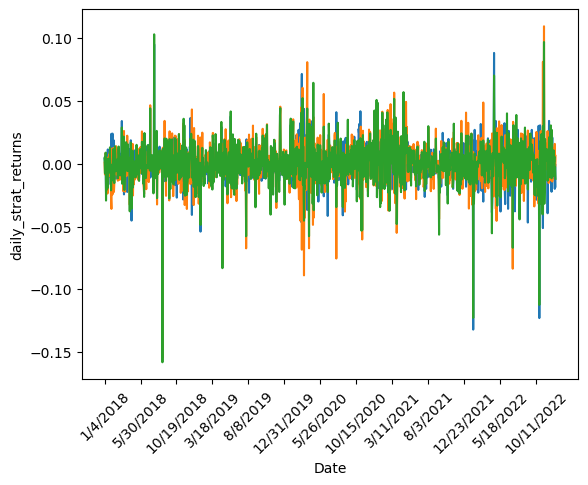

In [40]:
# Daily returns of stock as per allocation
daily_returns = (adjusted_weights.shift(1) * daily_stock_returns).dropna()
print(daily_returns)
plt.plot(daily_returns)

# Daily market returns as per allocation
daily_strategy_returns = np.sum(daily_returns,axis=1)
plt.plot(daily_strategy_returns)
plt.xticks(np.arange(0, len(df), 100), df.index[::100], rotation=45)
plt.xlabel('Date')
plt.ylabel('daily_strat_returns')

# Annualized returns
ann_avg_ret=252*np.mean(daily_strategy_returns)*100
print(ann_avg_ret)

In [54]:
# Sharpe Ratio
# assuming 252 is the number of trading days in a year
daily_strategy_returns_mean = np.mean(daily_strategy_returns)
daily_strategy_returns_std = np.std(daily_strategy_returns)
sharpe = np.sqrt(252)*daily_strategy_returns_mean/daily_strategy_returns_std
print (sharpe)

-0.027314567616473426


In [53]:
# Transaction Cost
# assuming 252 is the number of trading days in a year
# assuming 0.05% is the transaction cost
# The absolute difference between adjusted_weights and adjusted_weights shifted one day back represents the cost of rebalancing the portfolio each day
daily_returns_minus_cost = np.sum(daily_returns - 0.0005 * np.abs(adjusted_weights - adjusted_weights.shift(1)).dropna(),axis=1)
print(daily_returns_minus_cost)

ann_avg_ret=252*np.mean(daily_returns_minus_cost)*100
sharpe = np.sqrt(252)*np.mean(daily_returns_minus_cost)/np.std(daily_returns_minus_cost)
print (sharpe, ann_avg_ret)

Date
1/8/2018      0.003592
1/9/2018     -0.007539
1/10/2018    -0.007723
1/11/2018     0.007708
1/12/2018    -0.029383
                ...   
12/27/2022    0.000321
12/28/2022    0.004639
12/29/2022   -0.004383
12/30/2022   -0.002981
1/3/2023     -0.012098
Length: 1256, dtype: float64
-0.5078771720710902 -13.182918651761272
